# Bank Loan Dataset

The dataset likely contains information about bank customers and whether they were approved for a personal loan. The target variable seems to be Personal_Loan.
The data is structured in a tabular format, with rows representing individual customers and columns representing various features or attributes.
The features likely include customer demographics, financial information, and loan-related details. Examples include age, income, education, credit card usage, and existing loan balances.The dataset includes both numerical (e.g., income, loan amount) and potentially categorical features.

Potential Use Cases:

* Edicting loan eligibility for new customers.

* Unerstanding factors influencing loan approval.

* Identifying customer segments with higher loan acceptance rates.

* Developing risk assesment models for loan applications

## Importing Libraries


In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score



## Load the Dataset

In [30]:
df=pd.read_csv(r"C:\Users\alant\Downloads\bankk\bankloan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Cleaning

In [31]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.columns=df.columns.str.replace(".","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


C:\Users\alant\AppData\Local\Temp\ipykernel_11292\1029447460.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns=df.columns.str.replace(".","_")


## Taking first five rows using head() function

In [34]:
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Taking last five rows using tail() function

In [35]:
df.tail()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Experience'),
  Text(3, 0, 'Income'),
  Text(4, 0, 'ZIP_Code'),
  Text(5, 0, 'Family'),
  Text(6, 0, 'CCAvg'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Mortgage'),
  Text(9, 0, 'Personal_Loan'),
  Text(10, 0, 'Securities_Account'),
  Text(11, 0, 'CD_Account'),
  Text(12, 0, 'Online'),
  Text(13, 0, 'CreditCard')])

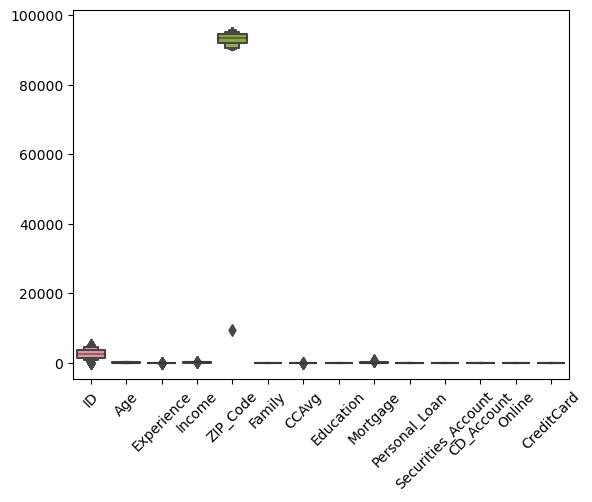

In [36]:
sns.boxenplot(data=df)
plt.xticks(rotation=45)

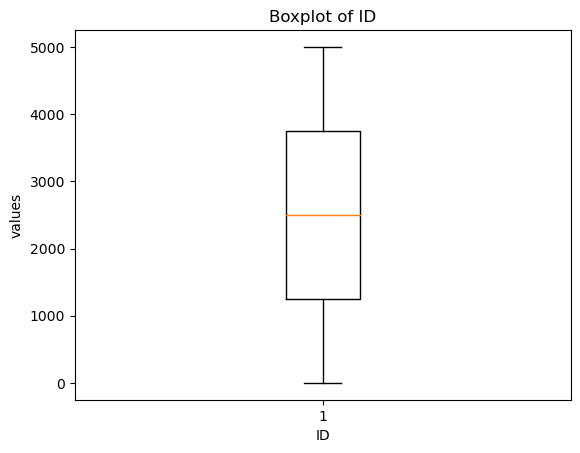

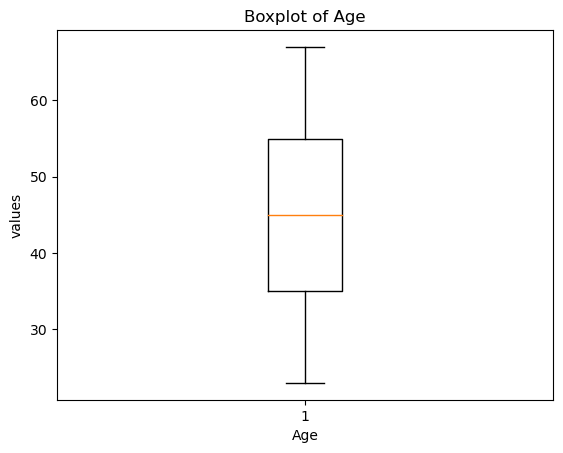

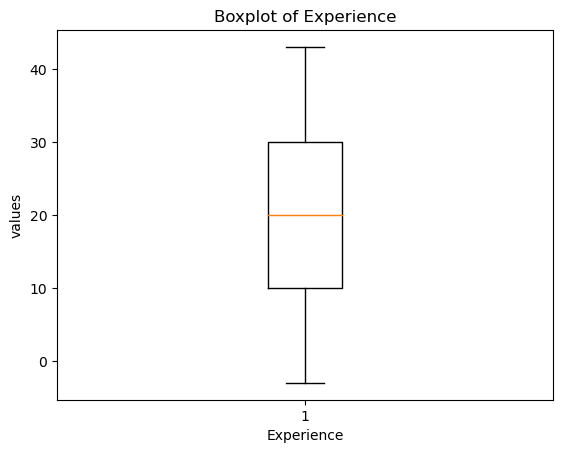

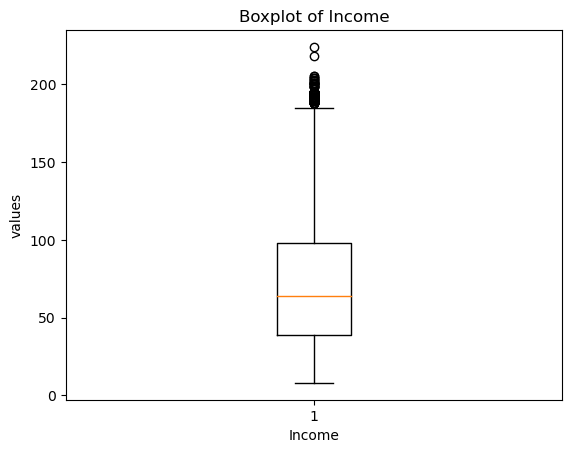

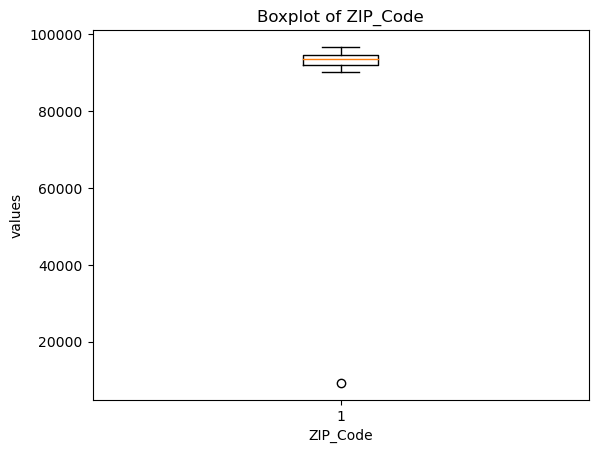

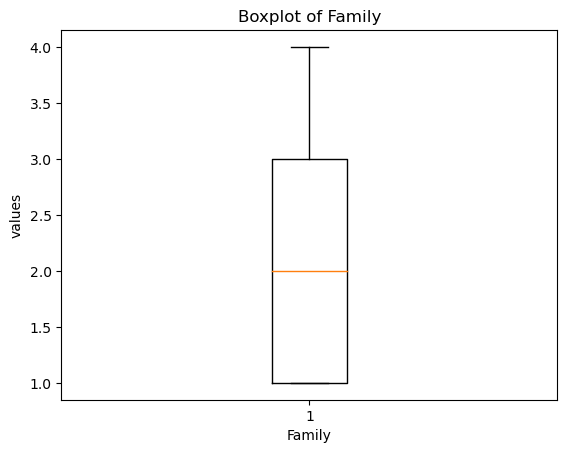

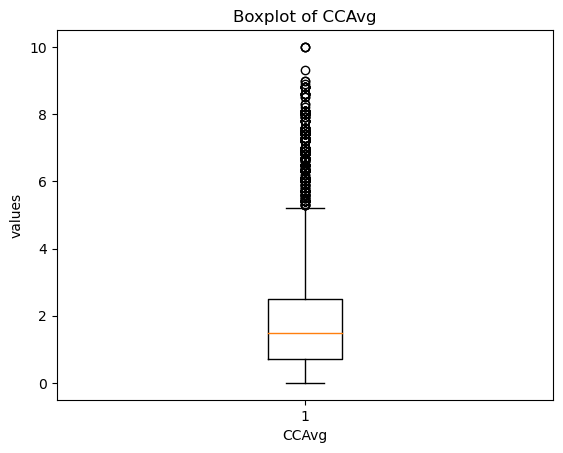

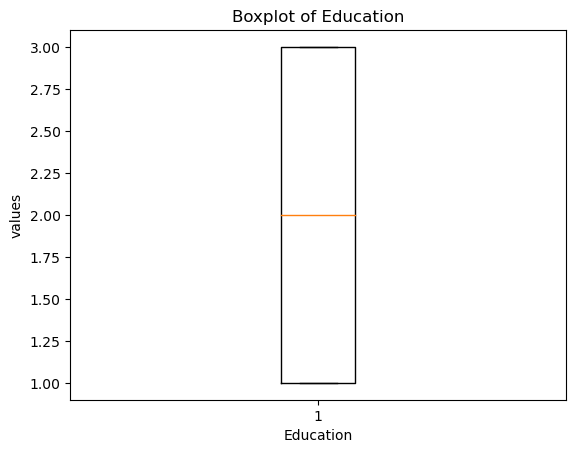

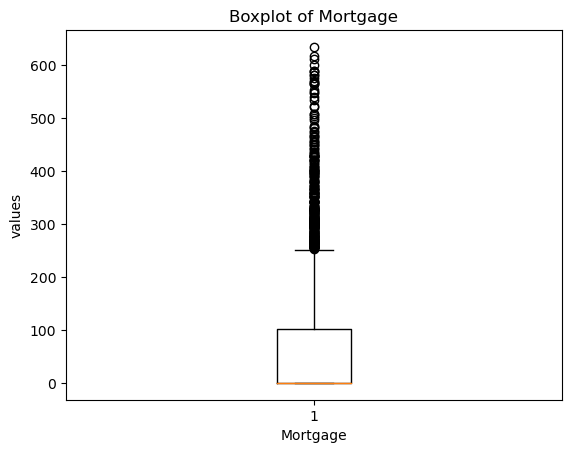

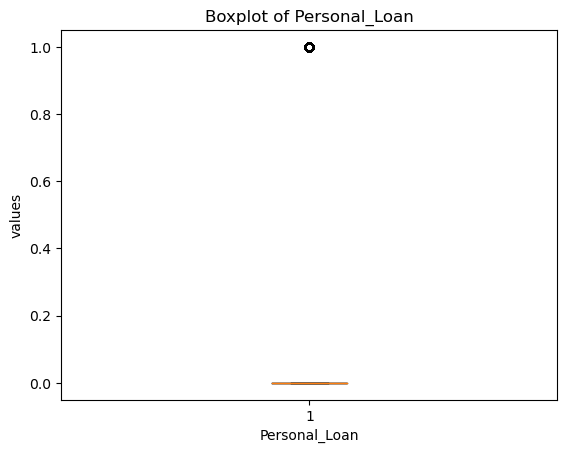

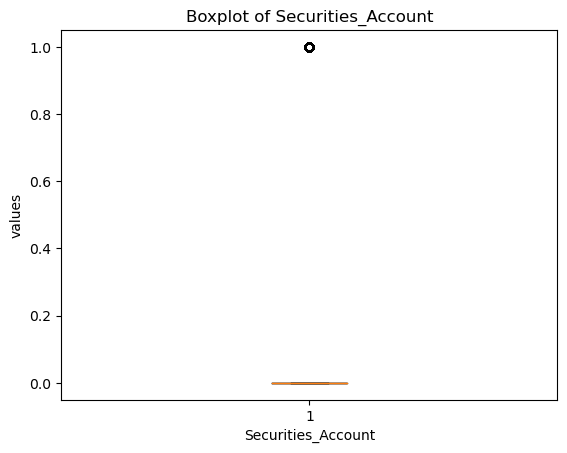

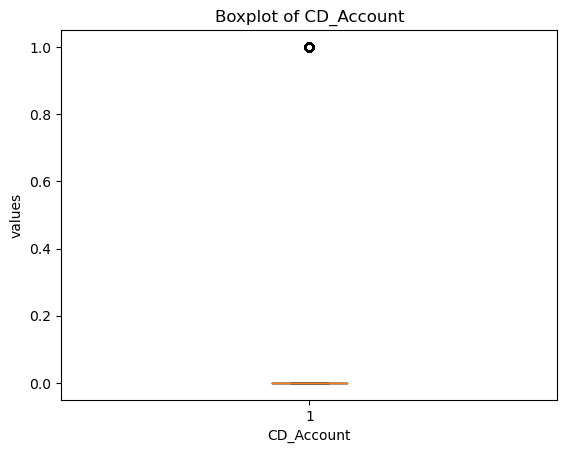

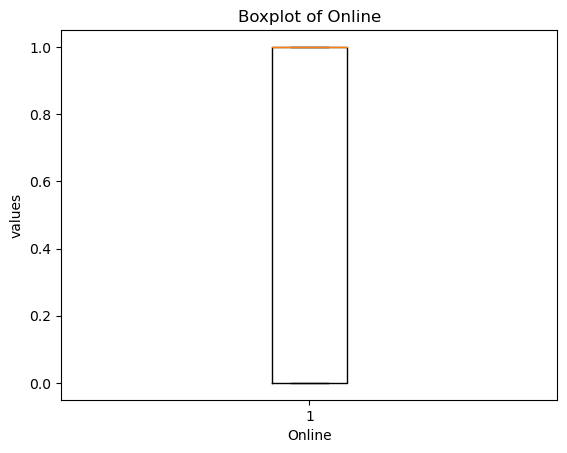

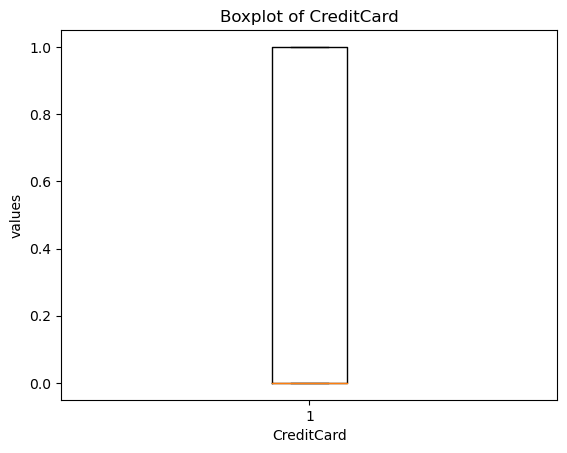

In [37]:
for i in df.select_dtypes(include='number').columns:
    plt.boxplot(data=df,x=i)
    plt.title(f"Boxplot of {i}")
    plt.xlabel(i)
    plt.ylabel("values")
    plt.show()

## Statistical Analysis
 ### 1. Describe()

In [38]:
numeric_data=df.select_dtypes(include='number')
des=numeric_data.describe()
print(des)

                ID          Age   Experience       Income      ZIP_Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

### 2.Covariance

In [39]:
covariance=numeric_data.cov()
print(covariance)

                              ID         Age  Experience       Income  \
ID                  2.083750e+06 -140.198640 -137.826465 -1175.826465   
Age                -1.401986e+02  131.404166  130.698543   -29.164822   
Experience         -1.378265e+02  130.698543  131.513962   -24.587099   
Income             -1.175826e+03  -29.164822  -24.587099  2119.104235   
ZIP_Code            4.113995e+04 -710.631942 -696.554125 -1602.857394   
Family             -2.782757e+01   -0.610664   -0.691802    -8.320957   
CCAvg              -6.225005e+01   -1.041997   -1.003637    51.970200   
Education           2.602130e+01    0.397949    0.126673    -7.250120   
Mortgage           -2.043805e+03  -14.619518  -12.342843   968.321693   
Personal_Loan      -1.054771e+01   -0.026092   -0.025047     6.814640   
Securities_Account -7.492298e+00   -0.001529   -0.004321    -0.036834   
CD_Account         -2.376275e+00    0.021965    0.028288     1.861611   
Online             -1.790558e+00    0.077058    0.0

### 3.Corelatoion

In [40]:
cor=numeric_data.corr()
print(cor)

                          ID       Age  Experience    Income  ZIP_Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP_Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal_Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities_Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD_Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

## Heatmap

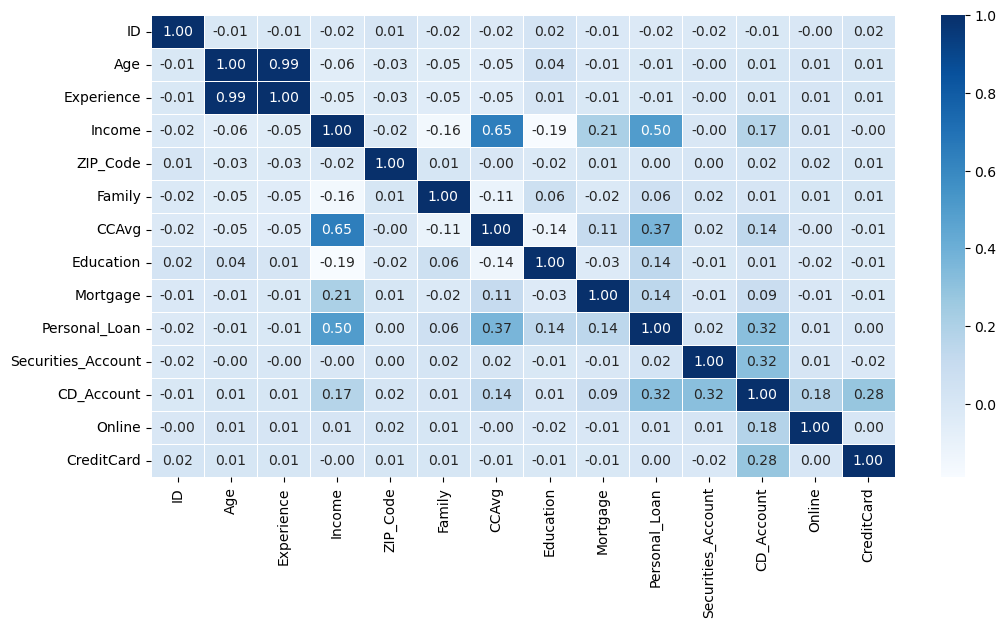

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap="Blues",linewidths=.5,fmt=".2f")
plt.show()

In [42]:
'''x=df.drop(columns=['ID','Personal_Loan'],axis=1)
y=df['Personal_Loan']'''

"x=df.drop(columns=['ID','Personal_Loan'],axis=1)\ny=df['Personal_Loan']"

In [43]:
'''col=df.select_dtypes(include='number')
for i in col:
    plt.boxplot(data=df,x=i)
    plt.title(f"Boxplot of {i}")
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.show()'''


'col=df.select_dtypes(include=\'number\')\nfor i in col:\n    plt.boxplot(data=df,x=i)\n    plt.title(f"Boxplot of {i}")\n    plt.xlabel(i)\n    plt.ylabel("Values")\n    plt.show()'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Experience'),
  Text(3, 0, 'Income'),
  Text(4, 0, 'ZIP_Code'),
  Text(5, 0, 'Family'),
  Text(6, 0, 'CCAvg'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Mortgage'),
  Text(9, 0, 'Personal_Loan'),
  Text(10, 0, 'Securities_Account'),
  Text(11, 0, 'CD_Account'),
  Text(12, 0, 'Online'),
  Text(13, 0, 'CreditCard')])

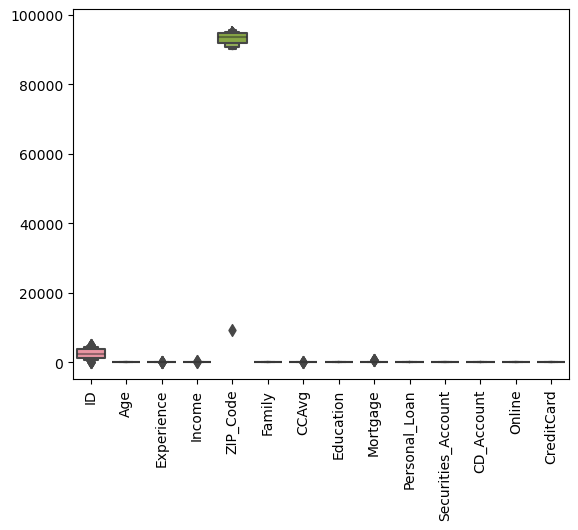

In [44]:
sns.boxenplot(data=df)
plt.xticks(rotation=90)

## Seperating dependent & Independent variables

In [45]:
x=df.drop(columns=['ID','Personal_Loan'],axis=1)
y=df['Personal_Loan']

## Scatterplot

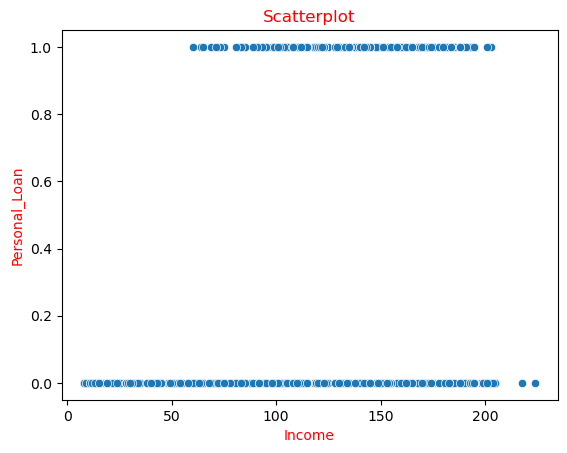

In [46]:
sns.scatterplot(x='Income',y='Personal_Loan',data=df)
plt.title("Scatterplot",color="red")
plt.xlabel("Income",color="red")
plt.ylabel("Personal_Loan",color="red")
plt.show()


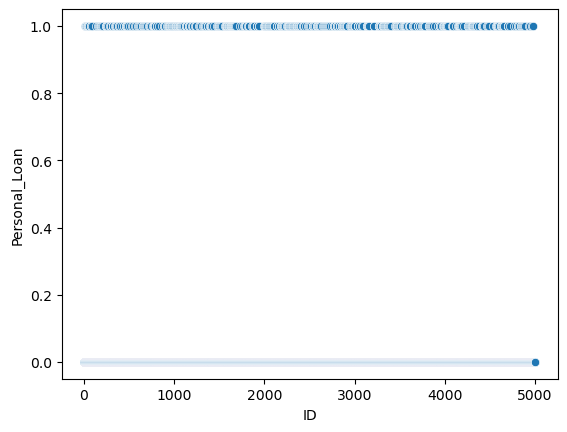

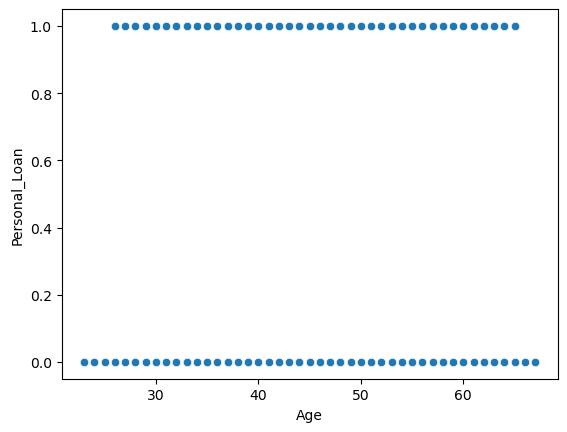

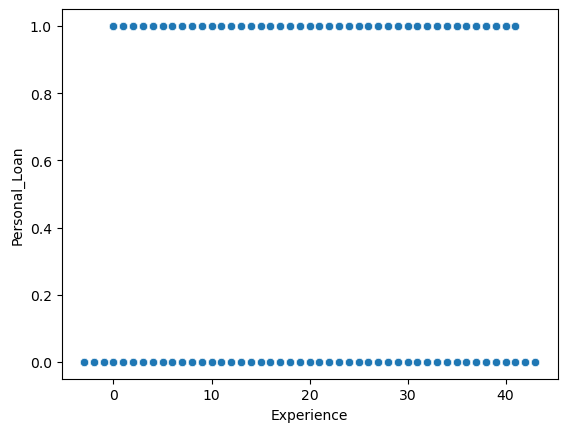

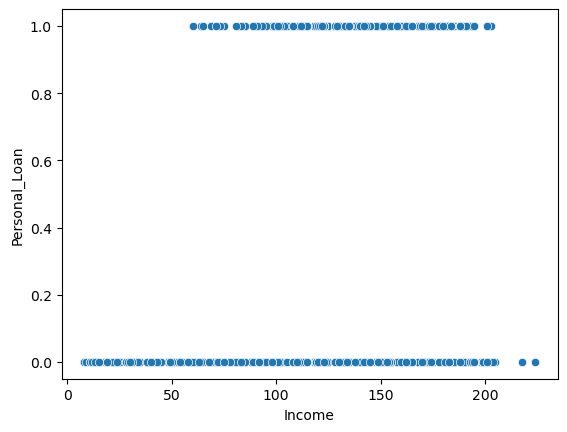

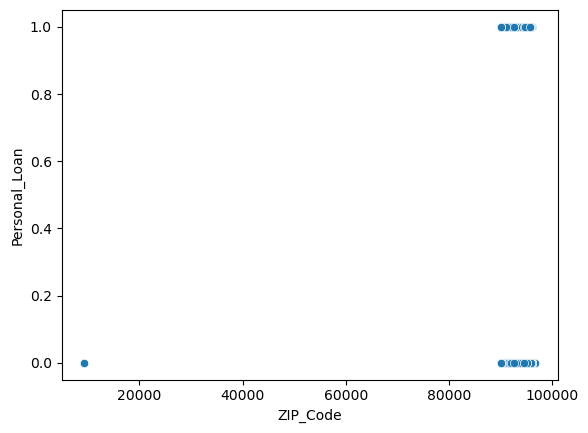

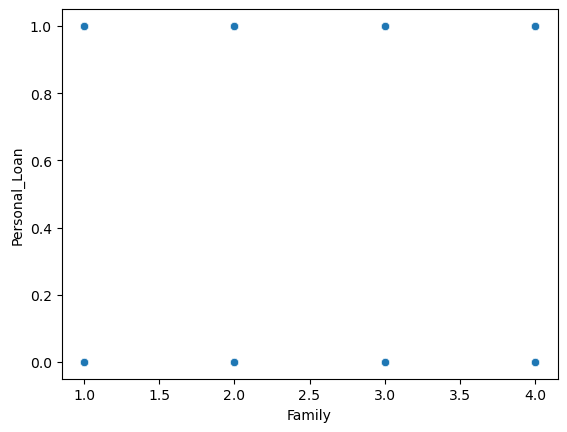

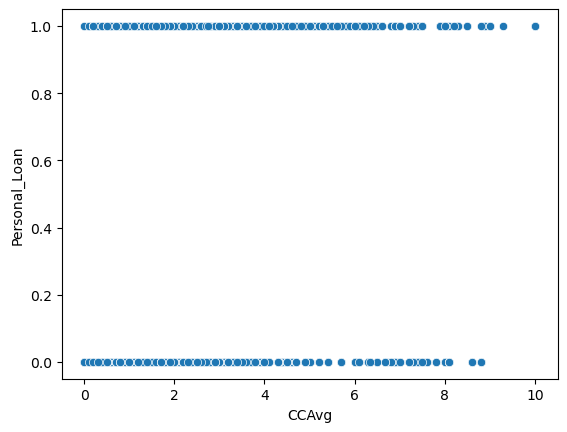

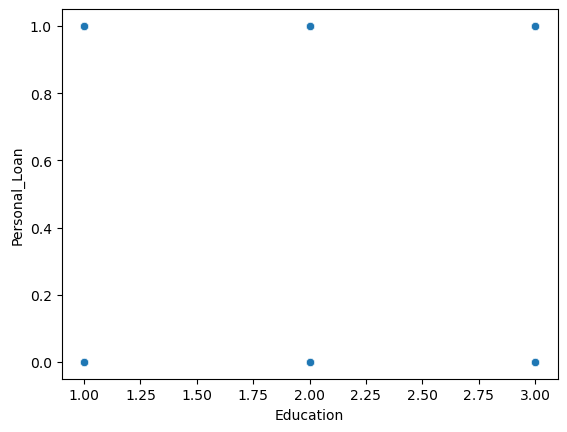

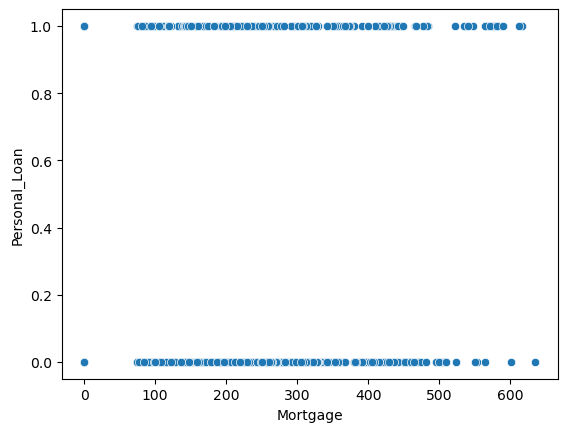

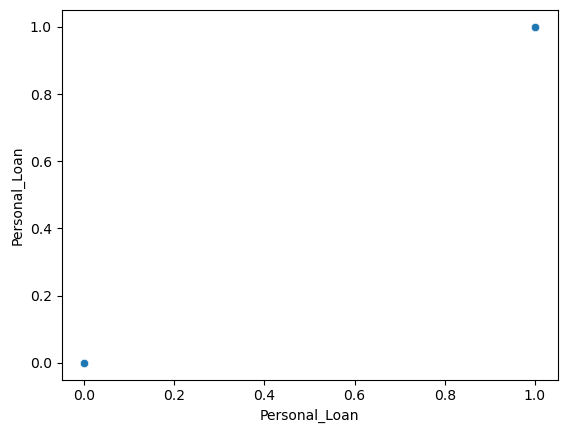

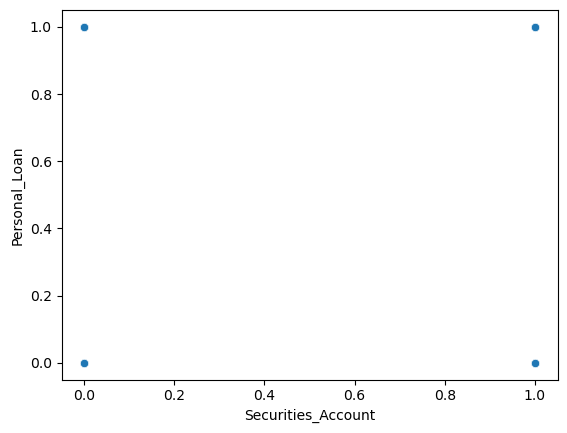

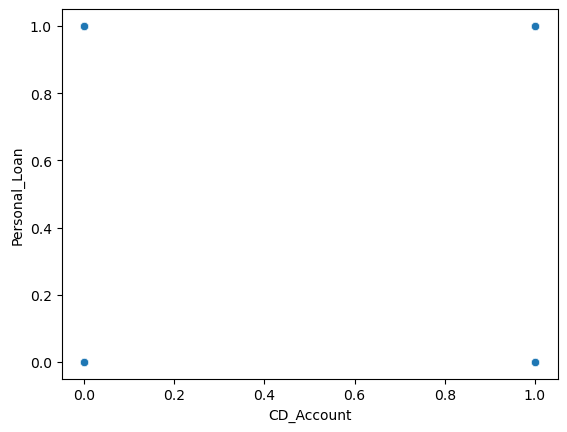

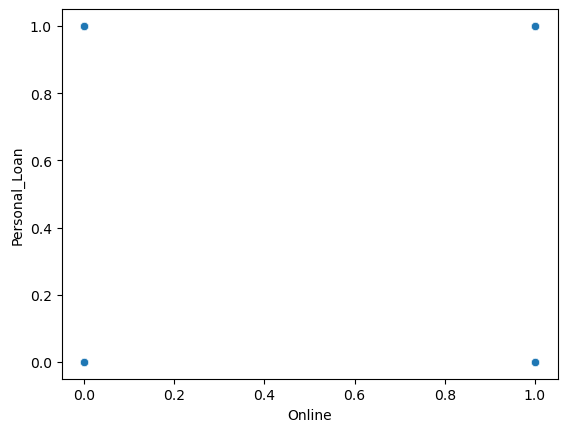

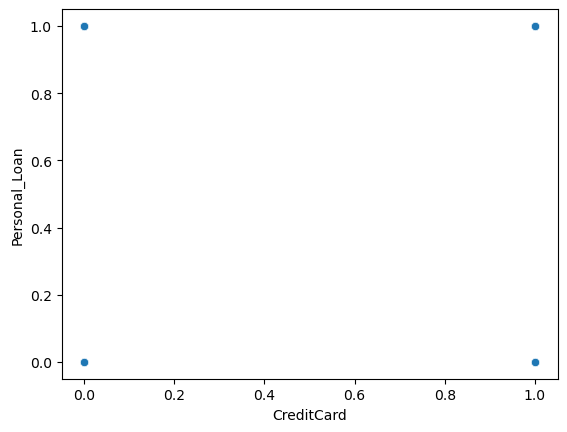

In [47]:
col=df.select_dtypes(include='number')
for i in col:
    sns.scatterplot(data=df,x=i,y=y)
    plt.show()

In [48]:
'''x=df.drop(columns=['ID','Personal_Loan'],axis=1)
y=df['Personal_Loan']'''

"x=df.drop(columns=['ID','Personal_Loan'],axis=1)\ny=df['Personal_Loan']"

## Split the Dataset into Training & Testing

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)


In [50]:
st=StandardScaler()
xtrain=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

## Building DecisionTreeClassifier Model

In [51]:
cl=DecisionTreeClassifier(criterion='entropy',random_state=0)
cl.fit(xtrain,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the test data & Calculating the accuracy

In [52]:
y_pred=cl.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


print("The accuracy is:",acc*100,"%")

Mean absolute error: 0.028
Mean squared error: 0.028
Mean absolute error: 0.1673320053068151
The accuracy is: 97.2 %


## Summary

This dataset contains information about bank customers and whether they were approved for a personal loan. The primary goal of analyzing this dataset could be to predict the likelihood of a customer accepting a personal loan offer or to identify key factors influencing loan approval decisions.The dataset includes a mix of numerical and categorical features.The target variable, "Personal Loan", is likely binary (0 or 1), indicating loan acceptance.Features like "Income", "CCAvg", and "Mortgage" could be important predictors for loan approval.Customer demographics (age, family, education) might also play a role in loan decisions.The presence of other banking products (Securities Account, CD Account, Online, CreditCard) might indicate customer loyalty or financial behavior.

#### Potential Applications:

* Predictive Modeling: Building machine learning models to predict loan acceptance based on customer features.

* Customer Segmentation: Identifying different customer groups with varying loan acceptance propensities.

* Marketing Campaigns: Targeting specific customer segments with personalized loan offers.

* Risk Assessment: Assessing the risk associated with granting loans to individual customers.

